# Prácticas ESAC: Flury22 - Model

1. Escape fraction of Ly$\alpha$ photons given by the model: $f_{esc,Ly\alpha}^{model}$
2. Comparation between $f_{esc,Ly\alpha}^{model}$ and $f_{esc,Ly\alpha}^{sobral}$
3. Comparation between $f_{esc,Ly\alpha}^{model}$ and $f_{esc,Ly\alpha}^{sobral}$ for differents ($\mathcal{L}_{1285}, Q(H0)$) conditions

   Appendix A: Saving data

$\textit{Juan A. Molina-Calzada}$

Mododelos utilizados: https://cab.inta-csic.es/users/mcs/SED2/

El objetivo de este cuaderno es comparar los resultados para la fracción de escape de fotones de Lyman alpha $f_{esc,Ly\alpha}$ obtenidos para los datos de Flury22 con los obtenidos para el modelo.

El modelo que vamos aplicar asume una metalicidad de Z = 0.008 - 0.020, un modelo continuo CSFR (aunque trabajaremos con el instantáneo IB también) y una función inicial de masas de Salpter con $\alpha$ = 2.35. Tambíen omitiremos las binarias y una stellar + nebula de ff = 1.0. Todas estas aproximaciones darán igual a degeneraciones.

Nota: Un modelo instantáneo IB es aquel que asume que las estrellas se forman de forma instantánea a partir de una única nube de gas (nacen todas al principio y van muriendo rápidamente las mas masivas) mientras que los modelos continuos CSFR asumen un proceso de formación estelar extendido en el tiempo (las muertes de estrellas se acaban igualando con las que nacen). Asumiremos $L_{1285} \simeq L_{1200}$ y una edad de 3Myr aproximadamente.

In [11]:
# Paquetes
from astropy.table import QTable
from astropy.io import ascii
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import smplotlib
import sys

# Leemos datos
Flury22 = QTable.read('/home/juanan/Escritorio/Juanan/Estudios/Master_en_Astrofisica/Practicas_ESAC/MyJob/data_Flury22/table1_5_Flury22_v1.dat', format = 'ascii', delimiter = ' ')
Flury22

ID,RAdeg,DEdeg,z,Visit,Date,Exp,Num,M1500,e_M1500,r50,e_r50,beta1200,e_beta1200,f1100,e_f1100,E_f1100,EWLya,e_EWLya,logSFR,e_logSFR,distance,logL1200,e_logL1200,E_logL1200,logLLya,e_logLLya,E_logLLya,f_esc_Lya,e_f_esc_Lya,logLLya_int,e_logLLya_int,E_logLLya_int,logN_ion,e_logN_ion,E_logN_ion
,deg,deg,,,,s,,mag,mag,kpc,kpc,,,1e-19 W / (nm m2),1e-19 W / (nm m2),1e-19 W / (nm m2),0.1 nm,0.1 nm,dex(solMass / yr),dex(solMass / yr),Mpc,dex(erg / (Angstrom s)),dex(erg / (Angstrom s)),dex(erg / (Angstrom s)),dex(erg / s),dex(erg / s),dex(erg / s),,,dex(erg / s),dex(erg / s),dex(erg / s),dex(1 / s),dex(1 / s),dex(1 / s)
str14,float64,float64,float64,str6,str10,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J003601+003307,9.002641,0.552006,0.3479,ldxe08,2019-09-25,3980.384,13,-18.527,0.095,0.445,0.148,-2.9,0.328,6.445,0.381,0.418,93.9,9.33,0.038,0.028,1368.012,40.159,0.026,0.028,42.132,0.045,0.045,0.451,0.045,42.478,0.047,0.047,53.402,0.02,0.02
J004743+015440,11.928487,1.911086,0.3535,ldxe42,2019-07-29,1495.904,9,-20.732,0.103,0.618,0.145,-2.38,0.298,38.611,2.507,2.787,41.526,4.427,1.363,0.031,1388.004,40.949,0.028,0.031,42.567,0.048,0.048,0.199,0.021,43.268,0.05,0.05,54.192,0.022,0.022
J011309+000223,18.286905,0.039839,0.3062,ldxez5,2019-08-03,1363.904,13,-20.268,0.118,0.627,0.133,-1.99,0.253,36.421,3.649,2.623,31.291,3.56,1.203,0.031,1217.134,40.81,0.043,0.031,42.305,0.053,0.051,0.15,0.017,43.129,0.054,0.054,54.053,0.023,0.023
J012217+052044,20.569425,5.345561,0.3656,ldxe05,2019-09-20,3780.32,15,-20.143,0.096,0.713,0.151,-1.609,0.274,23.193,1.595,1.427,70.616,6.793,0.915,0.027,1430.981,40.755,0.03,0.026,42.604,0.044,0.043,0.339,0.033,43.074,0.046,0.046,53.998,0.02,0.02
J012910+145935,22.2923,14.992967,0.28,ldxe53,2019-06-11,1568.032,5,-20.439,0.089,0.636,0.127,-1.672,0.205,50.705,3.6,2.979,39.593,4.84,1.354,0.026,1120.513,40.882,0.031,0.026,42.48,0.055,0.054,0.19,0.023,43.201,0.058,0.058,54.125,0.025,0.025
J072326+414608,110.856661,41.768828,0.2969,ldxe66,2019-09-05,3894.304,12,-19.907,0.08,0.437,0.129,-1.22,0.174,23.56,1.893,3.198,49.995,4.421,1.184,0.06,1182.999,40.596,0.035,0.059,42.295,0.041,0.046,0.24,0.021,42.915,0.042,0.043,53.839,0.018,0.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J154050+572442,235.209141,57.411647,0.2944,ldxe25,2019-07-12,1768.032,16,-21.279,0.045,0.946,0.135,-1.433,0.117,80.832,2.415,2.382,8.113,1.368,1.873,0.013,1173.792,41.125,0.013,0.013,42.034,0.073,0.073,0.039,0.007,43.443,0.084,0.084,54.367,0.036,0.036


## 1. Escape fraction of Ly$\alpha$ photons given by the model: $f_{esc,Ly\alpha}^{model}$

En primer lugar, para poder calcular la $f_{esc,Ly\alpha}^{model}$, nos es necesario obtener el $N_{ion}^{model}$. Para ello, a partir de los datos de $L_{1200}$ obtenidos con Flury22, estimaremos un valor másico que multiplicaremos por el número de fotones ionizantes por unidad de masa para obtener finalmente el $N_{ion}^{model}$. Conocido esto, ya podremos calcular la fracción de escape.

$$
\begin{equation}
    \frac{L_{1200}[erg\cdot s^{-1} \cdot Å^{-1}]}{\mathcal{L}_{1285} [erg\cdot s^{-1} \cdot Å^{-1} \cdot M_{\odot}^{-1}]} = M [M_{\odot}]
\end{equation}
$$

$$
\begin{equation}
    M [M_{\odot}] \cdot Q(H0) [ph \cdot s^{-1} \cdot M_{\odot}^{-1}] = N_{ion}^{model} [ph \cdot s^{-1}]
\end{equation}
$$

Para una edad de $t \simeq 3.6\,Myr$, asumimos un $\mathcal{L}_{1285} \simeq 6 \cdot 10^{33} erg \cdot s^{-1} \cdot Å^{-1} M_{\odot}^{-1}$ y $Q(H0) \simeq 10^{46.7365} ph \cdot s^{-1} \cdot M_{\odot}^{-1}$ (estimadas de los modelos).

La función de escapa venía dada por

$$
\begin{equation}
    f_{esc,Ly\alpha}^{model} = \frac{L_{Ly\alpha,obs}}{1.19 \cdot 10^{-11} \cdot N_{ion}^{model} [ph \cdot s^{-1}]}
\end{equation}
$$

cuyo error viene dado por

$$
\begin{equation}
    \Delta f_{esc,Ly\alpha}^{model} = \sqrt{\left(\frac{\Delta L_{Ly\alpha,obs}}{1.19 \cdot 10^{-11} \cdot N_{ion}^{model}}\right)^2 + \left(\frac{ L_{Ly\alpha,obs} \cdot \Delta L_{1200}}{1.19 \cdot 10^{-11} \cdot N_{ion}^{model} \cdot L_{1200}}\right)^2}.
\end{equation}
$$

In [2]:
# Suposiciones modelos
L_1285 = 6 * 10**33 * u.erg / u.s / u.angstrom / u.M_sun
Q_H0 = 10**46.7365 / u.s / u.M_sun

# Masa [M_sun]
M = (10**Flury22['logL1200'].value / L_1285.value) * u.M_sun
N_ion_model = (M.value * Q_H0.value) / u.s

# Fracción de escape de Lyman alpha (modelo)
f_esc_Lya_model = 10**Flury22['logLLya'].value / (1.19*10**(-11) * N_ion_model.value)
f_esc_Lya_model = [1 if i > 1 else i for i in f_esc_Lya_model] # f_esc > 1 --> = 1
Flury22['f_esc_Lya_model'] = np.round(f_esc_Lya_model,3)

# Error en la fracción de escape de Lyman alpha (modelo)
e_f_esc_Lya_model = []
for i in range(len(Flury22['f_esc_Lya_model'])):
    if Flury22['f_esc_Lya_model'][i]<1:
        e_f_esc_Lya_model.append(np.round(np.sqrt(( (Flury22['e_logLLya'][i].value*(10**Flury22['logLLya'][i].value)) / (1.19*10**(-11)*N_ion_model[i].value) )**2+(10**Flury22['logLLya'][i].value/(1.19*10**(-11)*N_ion_model[i].value))**2*(10**Flury22['logL1200'][i].value*Flury22['e_logL1200'][i].value/(10**Flury22['logL1200'][i].value)**2)**2),3))
    else:
        e_f_esc_Lya_model.append(0)

Flury22['e_f_esc_Lya_model'] = np.round(e_f_esc_Lya_model,3)
Flury22

ID,RAdeg,DEdeg,z,Visit,Date,Exp,Num,M1500,e_M1500,r50,e_r50,beta1200,e_beta1200,f1100,e_f1100,E_f1100,EWLya,e_EWLya,logSFR,e_logSFR,distance,logL1200,e_logL1200,E_logL1200,logLLya,e_logLLya,E_logLLya,f_esc_Lya,e_f_esc_Lya,logLLya_int,e_logLLya_int,E_logLLya_int,logN_ion,e_logN_ion,E_logN_ion,f_esc_Lya_model,e_f_esc_Lya_model
,deg,deg,,,,s,,mag,mag,kpc,kpc,,,1e-19 W / (nm m2),1e-19 W / (nm m2),1e-19 W / (nm m2),0.1 nm,0.1 nm,dex(solMass / yr),dex(solMass / yr),Mpc,dex(erg / (Angstrom s)),dex(erg / (Angstrom s)),dex(erg / (Angstrom s)),dex(erg / s),dex(erg / s),dex(erg / s),,,dex(erg / s),dex(erg / s),dex(erg / s),dex(1 / s),dex(1 / s),dex(1 / s),,
str14,float64,float64,float64,str6,str10,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J003601+003307,9.002641,0.552006,0.3479,ldxe08,2019-09-25,3980.384,13,-18.527,0.095,0.445,0.148,-2.9,0.328,6.445,0.381,0.418,93.9,9.33,0.038,0.028,1368.012,40.159,0.026,0.028,42.132,0.045,0.045,0.451,0.045,42.478,0.047,0.047,53.402,0.02,0.02,0.869,0.039
J004743+015440,11.928487,1.911086,0.3535,ldxe42,2019-07-29,1495.904,9,-20.732,0.103,0.618,0.145,-2.38,0.298,38.611,2.507,2.787,41.526,4.427,1.363,0.031,1388.004,40.949,0.028,0.031,42.567,0.048,0.048,0.199,0.021,43.268,0.05,0.05,54.192,0.022,0.022,0.384,0.018
J011309+000223,18.286905,0.039839,0.3062,ldxez5,2019-08-03,1363.904,13,-20.268,0.118,0.627,0.133,-1.99,0.253,36.421,3.649,2.623,31.291,3.56,1.203,0.031,1217.134,40.81,0.043,0.031,42.305,0.053,0.051,0.15,0.017,43.129,0.054,0.054,54.053,0.023,0.023,0.289,0.015
J012217+052044,20.569425,5.345561,0.3656,ldxe05,2019-09-20,3780.32,15,-20.143,0.096,0.713,0.151,-1.609,0.274,23.193,1.595,1.427,70.616,6.793,0.915,0.027,1430.981,40.755,0.03,0.026,42.604,0.044,0.043,0.339,0.033,43.074,0.046,0.046,53.998,0.02,0.02,0.653,0.029
J012910+145935,22.2923,14.992967,0.28,ldxe53,2019-06-11,1568.032,5,-20.439,0.089,0.636,0.127,-1.672,0.205,50.705,3.6,2.979,39.593,4.84,1.354,0.026,1120.513,40.882,0.031,0.026,42.48,0.055,0.054,0.19,0.023,43.201,0.058,0.058,54.125,0.025,0.025,0.367,0.02
J072326+414608,110.856661,41.768828,0.2969,ldxe66,2019-09-05,3894.304,12,-19.907,0.08,0.437,0.129,-1.22,0.174,23.56,1.893,3.198,49.995,4.421,1.184,0.06,1182.999,40.596,0.035,0.059,42.295,0.041,0.046,0.24,0.021,42.915,0.042,0.043,53.839,0.018,0.019,0.462,0.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J154050+572442,235.209141,57.411647,0.2944,ldxe25,2019-07-12,1768.032,16,-21.279,0.045,0.946,0.135,-1.433,0.117,80.832,2.415,2.382,8.113,1.368,1.873,0.013,1173.792,41.125,0.013,0.013,42.034,0.073,0.073,0.039,0.007,43.443,0.084,0.084,54.367,0.036,0.036,0.075,0.005


## 2. Comparation between $f_{esc,Ly\alpha}^{model}$ and $f_{esc,Ly\alpha}^{sobral}$

Ahora es el momento de representar las dos fracciones de escape para ver su correlación.

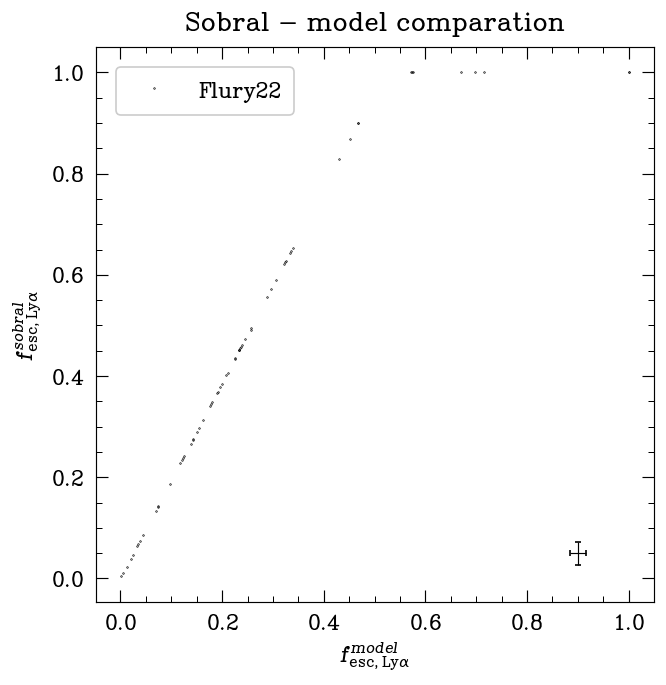

In [3]:
# Comparativa funciones de escapa Sobral - Modelo
plt.plot(Flury22['f_esc_Lya'] , Flury22['f_esc_Lya_model'], ".", color = 'black',markersize = 0.7, label = 'Flury22')

plt.errorbar(0.9, 0.05, yerr = np.mean(Flury22['e_f_esc_Lya']), xerr = np.mean(Flury22['e_f_esc_Lya_model']), linewidth = 0.7)

plt.xlabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{model}$')
plt.ylabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{sobral}$')
plt.title('Sobral - model comparation')
plt. legend(frameon=True)

plt.show()

## 3. Comparation between $f_{esc,Ly\alpha}^{model}$ and $f_{esc,Ly\alpha}^{sobral}$ for differents ($\mathcal{L}_{1285}, Q(H0)$) conditions

En esta sección, vamos a plotear la relación anterior de fracción de escape de fotones Lyman alpha con Sobral frente a los modelos para diferentes condiciones inciales de metalicidad Z, modelo IB o CSFR y edad.

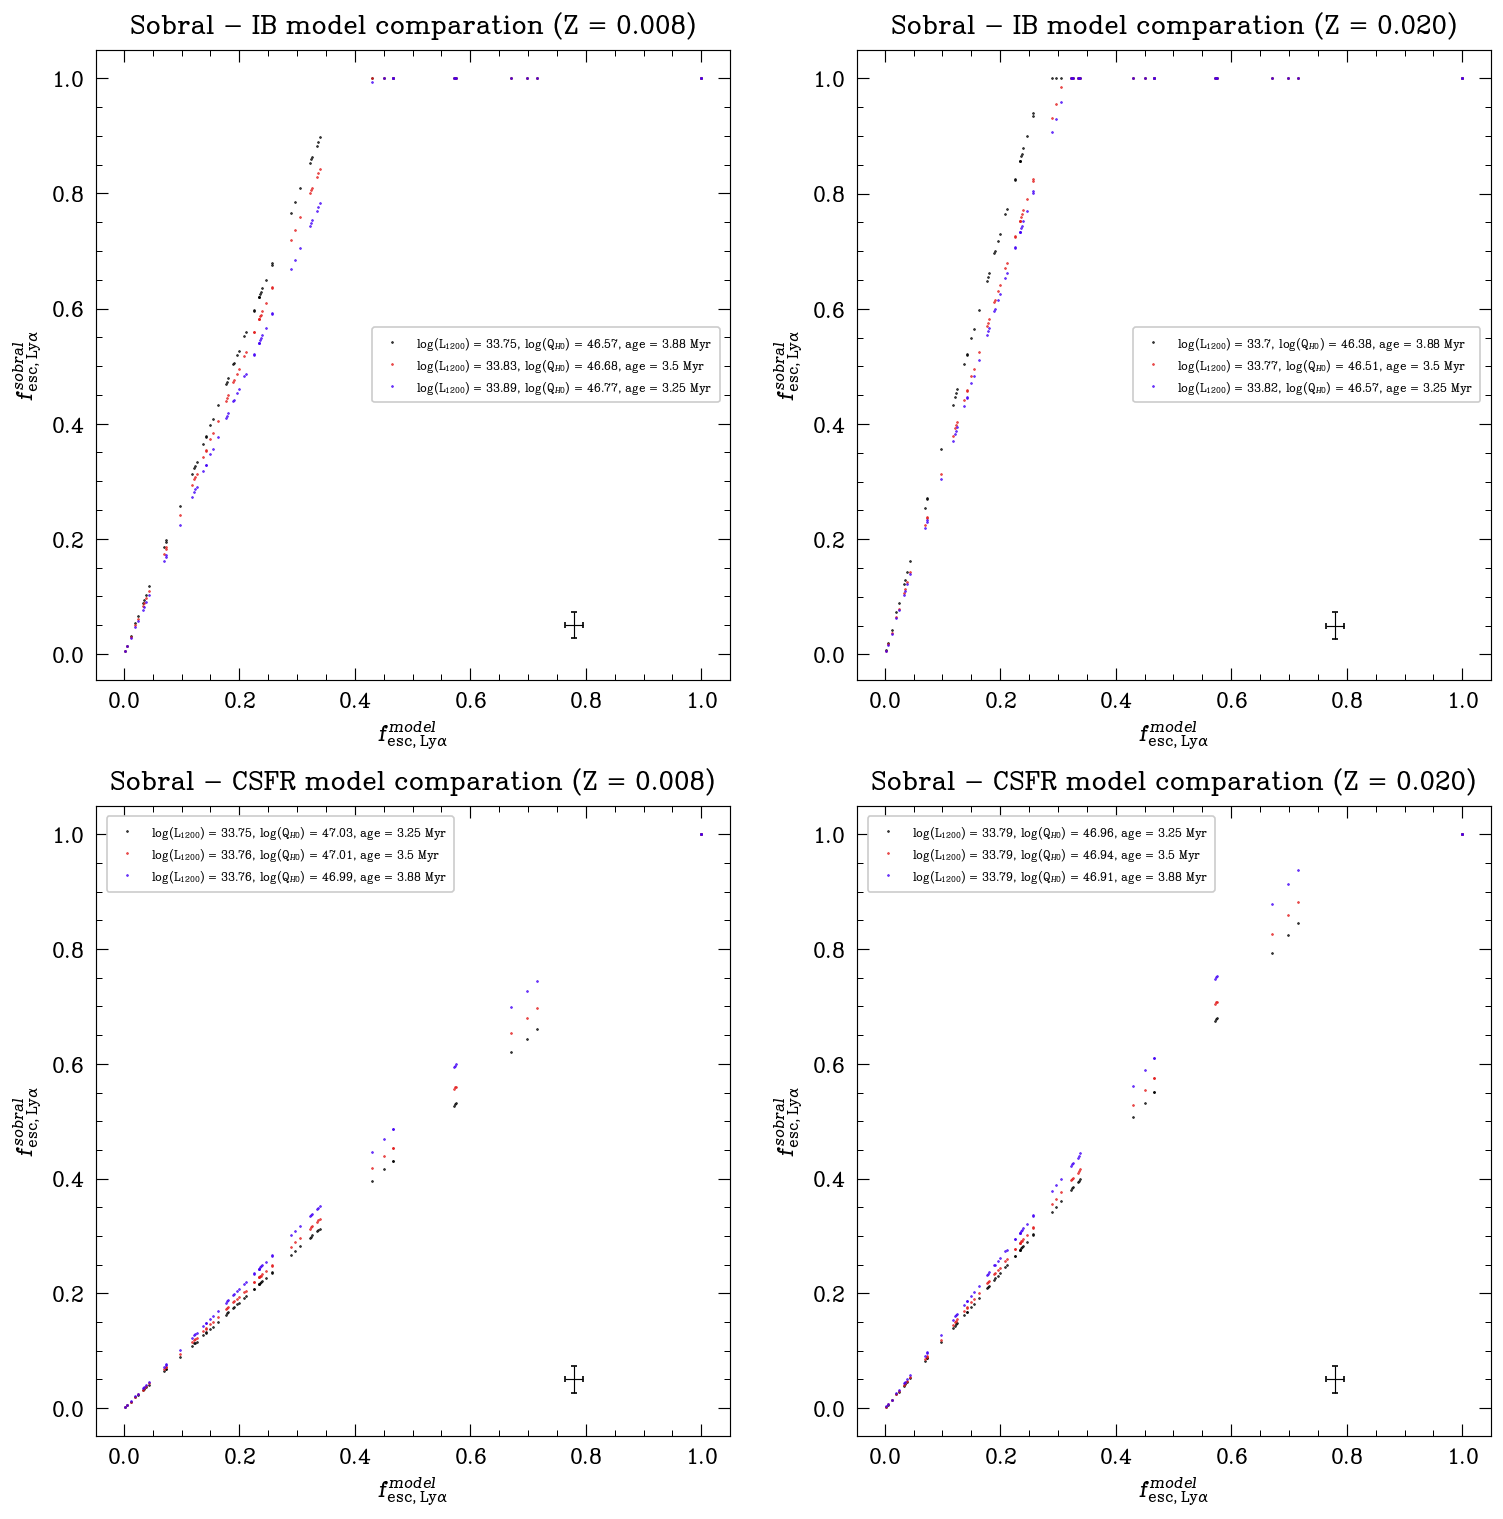

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

#PLOT IB (Z = 0.008) ----------------------------------------------------------------------------------------
# Condiciones L_1285 y Q_H0
L_1285_values = [5.593*10**33 , 6.73*10**33, 7.714*10**33] * u.erg / u.s / u.angstrom / u.M_sun
Q_H0_values = [10**46.568, 10**46.676, 10**46.767] / u.s / u.M_sun
age_values = [3.88, 3.5, 3.25] #u.Myr

colors = [f'C{i}' for i in range(len(L_1285_values))] # colores plot
color_index = 0

for j in range(len(L_1285_values)):

    # Condiciones Iniciales
    L_1285 = L_1285_values[j]
    Q_H0 = Q_H0_values[j]

    # Masa [M_sun]
    M = (10**Flury22['logL1200'].value / L_1285.value) * u.M_sun
    N_ion_model = (M.value * Q_H0.value) / u.s
    
    # Fracción de escape de Lyman alpha (modelo)
    f_esc_Lya_model_i = 10**Flury22['logLLya'].value / (1.19*10**(-11) * N_ion_model.value)
    f_esc_Lya_model_i = [1 if i > 1 else i for i in f_esc_Lya_model_i] # f_esc > 1 --> = 1
    f_esc_Lya_model_i = np.round(f_esc_Lya_model_i,3)
    
    # Error en la fracción de escape de Lyman alpha (modelo)
    e_f_esc_Lya_model_i = []
    for i in range(len(f_esc_Lya_model_i)):
        if f_esc_Lya_model_i[i]<1:
            e_f_esc_Lya_model_i.append(np.round(np.sqrt(( (Flury22['e_logLLya'][i].value*(10**Flury22['logLLya'][i].value)) / (1.19*10**(-11)*N_ion_model[i].value) )**2+(10**Flury22['logLLya'][i].value/(1.19*10**(-11)*N_ion_model[i].value))**2*(10**Flury22['logL1200'][i].value*Flury22['e_logL1200'][i].value/(10**Flury22['logL1200'][i].value)**1)**2),3))
        else:
            e_f_esc_Lya_model_i.append(0)
    
    e_f_esc_Lya_model_i = np.round(e_f_esc_Lya_model_i,3)
    
    # Comparativa funciones de escapa Sobral - Modelo
    ax1.plot(Flury22['f_esc_Lya'] , f_esc_Lya_model_i, ".",markersize = 1, color = colors[color_index], label = f'log(L$_{{1200}}$) = {np.round(np.log10(L_1285_values.value[j]),2)}, log(Q$_{{H0}}$) = {np.round(np.log10(Q_H0_values.value[j]),2)}, age = {age_values[j]} Myr')
    color_index += 1

ax1.errorbar(0.78, 0.05, yerr = np.mean(Flury22['e_f_esc_Lya']), xerr = np.mean(Flury22['e_f_esc_Lya_model']), linewidth = 0.7)

ax1.set_xlabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{model}$')
ax1.set_ylabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{sobral}$')
ax1.set_title('Sobral - IB model comparation (Z = 0.008)')
ax1.legend(frameon=True, fontsize = 8)

#PLOT IB (Z = 0.020) ----------------------------------------------------------------------------------------
# Condiciones L_1285 y Q_H0
L_1285_values = [5.065*10**33 , 5.935*10**33, 6.655*10**33] * u.erg / u.s / u.angstrom / u.M_sun
Q_H0_values = [10**46.384, 10**46.509, 10**46.57] / u.s / u.M_sun
age_values = [3.88, 3.5, 3.25] #u.Myr

colors = [f'C{i}' for i in range(len(L_1285_values))] # colores plot
color_index = 0

for j in range(len(L_1285_values)):

    # Condiciones Iniciales
    L_1285 = L_1285_values[j]
    Q_H0 = Q_H0_values[j]

    # Masa [M_sun]
    M = (10**Flury22['logL1200'].value / L_1285.value) * u.M_sun
    N_ion_model = (M.value * Q_H0.value) / u.s
    
    # Fracción de escape de Lyman alpha (modelo)
    f_esc_Lya_model_i = 10**Flury22['logLLya'].value / (1.19*10**(-11) * N_ion_model.value)
    f_esc_Lya_model_i = [1 if i > 1 else i for i in f_esc_Lya_model_i] # f_esc > 1 --> = 1
    f_esc_Lya_model_i = np.round(f_esc_Lya_model_i,3)
    
    # Error en la fracción de escape de Lyman alpha (modelo)
    e_f_esc_Lya_model_i = []
    for i in range(len(f_esc_Lya_model_i)):
        if f_esc_Lya_model_i[i]<1:
            e_f_esc_Lya_model_i.append(np.round(np.sqrt(( (Flury22['e_logLLya'][i].value*(10**Flury22['logLLya'][i].value)) / (1.19*10**(-11)*N_ion_model[i].value) )**2+(10**Flury22['logLLya'][i].value/(1.19*10**(-11)*N_ion_model[i].value))**2*(10**Flury22['logL1200'][i].value*Flury22['e_logL1200'][i].value/(10**Flury22['logL1200'][i].value)**1)**2),3))
        else:
            e_f_esc_Lya_model_i.append(0)
    
    e_f_esc_Lya_model_i = np.round(e_f_esc_Lya_model_i,3)
    
    # Comparativa funciones de escapa Sobral - Modelo
    ax2.plot(Flury22['f_esc_Lya'] , f_esc_Lya_model_i, ".",markersize = 1, color = colors[color_index], label = f'log(L$_{{1200}}$) = {np.round(np.log10(L_1285_values.value[j]),2)}, log(Q$_{{H0}}$) = {np.round(np.log10(Q_H0_values.value[j]),2)}, age = {age_values[j]} Myr')
    color_index += 1

ax2.errorbar(0.78, 0.05, yerr = np.mean(Flury22['e_f_esc_Lya']), xerr = np.mean(Flury22['e_f_esc_Lya_model']), linewidth = 0.7)

ax2.set_xlabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{model}$')
ax2.set_ylabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{sobral}$')
ax2.set_title('Sobral - IB model comparation (Z = 0.020)')
ax2.legend(frameon=True, fontsize = 8)

#PLOT CSFR (Z = 0.008) ----------------------------------------------------------------------------------------
# Condiciones L_1285 y Q_H0
L_1285_values = [5.633*10**33 , 5.725*10**33, 5.752*10**33] * u.erg / u.s / u.angstrom / u.M_sun
Q_H0_values = [10**47.029, 10**47.013, 10**46.986] / u.s / u.M_sun
age_values = [3.25, 3.5, 3.88] #u.Myr

colors = [f'C{i}' for i in range(len(L_1285_values))] # colores plot
color_index = 0

for j in range(len(L_1285_values)):

    # Condiciones Iniciales
    L_1285 = L_1285_values[j]
    Q_H0 = Q_H0_values[j]

    # Masa [M_sun]
    M = (10**Flury22['logL1200'].value / L_1285.value) * u.M_sun
    N_ion_model = (M.value * Q_H0.value) / u.s
    
    # Fracción de escape de Lyman alpha (modelo)
    f_esc_Lya_model_i = 10**Flury22['logLLya'].value / (1.19*10**(-11) * N_ion_model.value)
    f_esc_Lya_model_i = [1 if i > 1 else i for i in f_esc_Lya_model_i] # f_esc > 1 --> = 1
    f_esc_Lya_model_i = np.round(f_esc_Lya_model_i,3)
    
    # Error en la fracción de escape de Lyman alpha (modelo)
    e_f_esc_Lya_model_i = []
    for i in range(len(f_esc_Lya_model_i)):
        if f_esc_Lya_model_i[i]<1:
            e_f_esc_Lya_model_i.append(np.round(np.sqrt(( (Flury22['e_logLLya'][i].value*(10**Flury22['logLLya'][i].value)) / (1.19*10**(-11)*N_ion_model[i].value) )**2+(10**Flury22['logLLya'][i].value/(1.19*10**(-11)*N_ion_model[i].value))**2*(10**Flury22['logL1200'][i].value*Flury22['e_logL1200'][i].value/(10**Flury22['logL1200'][i].value)**1)**2),3))
        else:
            e_f_esc_Lya_model_i.append(0)
    
    e_f_esc_Lya_model_i = np.round(e_f_esc_Lya_model_i,3)
    
    # Comparativa funciones de escapa Sobral - Modelo
    ax3.plot(Flury22['f_esc_Lya'] , f_esc_Lya_model_i, ".",markersize = 1, color = colors[color_index], label = f'log(L$_{{1200}}$) = {np.round(np.log10(L_1285_values.value[j]),2)}, log(Q$_{{H0}}$) = {np.round(np.log10(Q_H0_values.value[j]),2)}, age = {age_values[j]} Myr')
    color_index += 1

ax3.errorbar(0.78, 0.05, yerr = np.mean(Flury22['e_f_esc_Lya']), xerr = np.mean(Flury22['e_f_esc_Lya_model']), linewidth = 0.7)

ax3.set_xlabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{model}$')
ax3.set_ylabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{sobral}$')
ax3.set_title('Sobral - CSFR model comparation (Z = 0.008)')
ax3.legend(frameon=True, fontsize = 8)

#PLOT CSFR (Z = 0.020) ----------------------------------------------------------------------------------------
# Condiciones L_1285 y Q_H0
L_1285_values = [6.205*10**33 , 6.178*10**33, 6.116*10**33] * u.erg / u.s / u.angstrom / u.M_sun
Q_H0_values = [10**46.964, 10**46.944, 10**46.913] / u.s / u.M_sun
age_values = [3.25, 3.5, 3.88] #u.Myr

colors = [f'C{i}' for i in range(len(L_1285_values))] # colores plot
color_index = 0

for j in range(len(L_1285_values)):

    # Condiciones Iniciales
    L_1285 = L_1285_values[j]
    Q_H0 = Q_H0_values[j]

    # Masa [M_sun]
    M = (10**Flury22['logL1200'].value / L_1285.value) * u.M_sun
    N_ion_model = (M.value * Q_H0.value) / u.s
    
    # Fracción de escape de Lyman alpha (modelo)
    f_esc_Lya_model_i = 10**Flury22['logLLya'].value / (1.19*10**(-11) * N_ion_model.value)
    f_esc_Lya_model_i = [1 if i > 1 else i for i in f_esc_Lya_model_i] # f_esc > 1 --> = 1
    f_esc_Lya_model_i = np.round(f_esc_Lya_model_i,3)
    
    # Error en la fracción de escape de Lyman alpha (modelo)
    e_f_esc_Lya_model_i = []
    for i in range(len(f_esc_Lya_model_i)):
        if f_esc_Lya_model_i[i]<1:
            e_f_esc_Lya_model_i.append(np.round(np.sqrt(( (Flury22['e_logLLya'][i].value*(10**Flury22['logLLya'][i].value)) / (1.19*10**(-11)*N_ion_model[i].value) )**2+(10**Flury22['logLLya'][i].value/(1.19*10**(-11)*N_ion_model[i].value))**2*(10**Flury22['logL1200'][i].value*Flury22['e_logL1200'][i].value/(10**Flury22['logL1200'][i].value)**1)**2),3))
        else:
            e_f_esc_Lya_model_i.append(0)
    
    e_f_esc_Lya_model_i = np.round(e_f_esc_Lya_model_i,3)
    
    # Comparativa funciones de escapa Sobral - Modelo
    ax4.plot(Flury22['f_esc_Lya'] , f_esc_Lya_model_i, ".",markersize = 1, color = colors[color_index], label = f'log(L$_{{1200}}$) = {np.round(np.log10(L_1285_values.value[j]),2)}, log(Q$_{{H0}}$) = {np.round(np.log10(Q_H0_values.value[j]),2)}, age = {age_values[j]} Myr')
    color_index += 1

ax4.errorbar(0.78, 0.05, yerr = np.mean(Flury22['e_f_esc_Lya']), xerr = np.mean(Flury22['e_f_esc_Lya_model']), linewidth = 0.7)

ax4.set_xlabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{model}$')
ax4.set_ylabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{sobral}$')
ax4.set_title('Sobral - CSFR model comparation (Z = 0.020)')
ax4.legend(frameon=True, fontsize = 8)

plt.show()

### 3.1 Range of values

Una vez que conocemos como fluctua esta última relación en función de las condiciones del modelo, representamos el intervalo (cono) donde se encontrarán la mayor parte de los valores. 

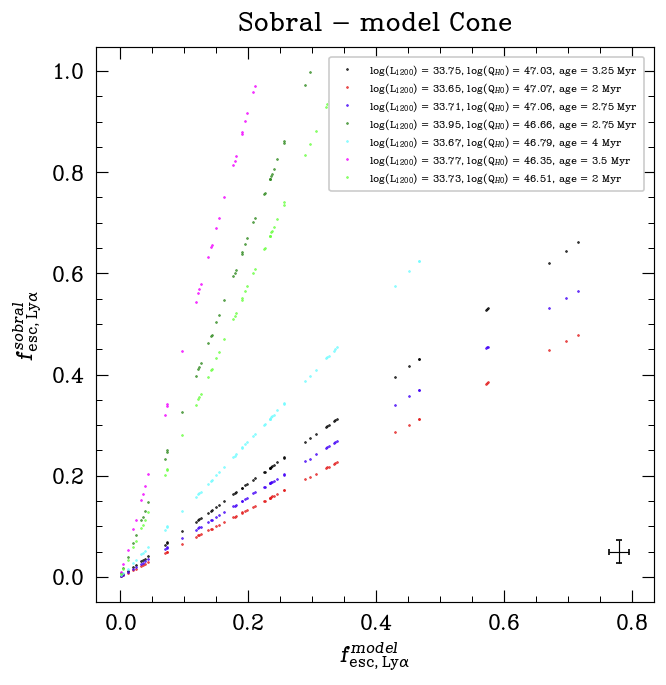

In [5]:
# Condiciones L_1285 y Q_H0
L_1285_values = [5.633*10**33, 4.496*10**33, 5.172*10**33, 8.812*10**33, 4.694*10**33, 5.935*10**33, 5.315*10**33]* u.erg / u.s / u.angstrom / u.M_sun
Q_H0_values = [10**47.029, 10**47.071, 10**47.059, 10**46.662, 10**46.788, 10**46.354, 10**46.509] / u.s / u.M_sun
age_values = [3.25, 2, 2.75, 2.75, 4, 3.5, 2] #u.Myr

colors = [f'C{i}' for i in range(len(L_1285_values))] # colores plot
color_index = 0

for j in range(len(L_1285_values)):

    # Condiciones Iniciales
    L_1285 = L_1285_values[j]
    Q_H0 = Q_H0_values[j]

    # Masa [M_sun]
    M = (10**Flury22['logL1200'].value / L_1285.value) * u.M_sun
    N_ion_model = (M.value * Q_H0.value) / u.s
    
    # Fracción de escape de Lyman alpha (modelo)
    f_esc_Lya_model_i = 10**Flury22['logLLya'].value / (1.19*10**(-11) * N_ion_model.value)
    f_esc_Lya_model_i = [1 if i > 1 else i for i in f_esc_Lya_model_i] # f_esc > 1 --> = 1
    f_esc_Lya_model_i = np.round(f_esc_Lya_model_i,3)
    
    # Error en la fracción de escape de Lyman alpha (modelo)
    e_f_esc_Lya_model_i = []
    for i in range(len(f_esc_Lya_model_i)):
        if f_esc_Lya_model_i[i]<1:
            e_f_esc_Lya_model_i.append(np.round(np.sqrt(( (Flury22['e_logLLya'][i].value*(10**Flury22['logLLya'][i].value)) / (1.19*10**(-11)*N_ion_model[i].value) )**2+(10**Flury22['logLLya'][i].value/(1.19*10**(-11)*N_ion_model[i].value))**2*(10**Flury22['logL1200'][i].value*Flury22['e_logL1200'][i].value/(10**Flury22['logL1200'][i].value)**1)**2),3))
        else:
            e_f_esc_Lya_model_i.append(0)
    
    e_f_esc_Lya_model_i = np.round(e_f_esc_Lya_model_i,3)
    
    # Comparativa funciones de escapa Sobral - Modelo
    condicion = (Flury22['f_esc_Lya'] != 1) & (f_esc_Lya_model_i != 1)
    plt.plot(Flury22['f_esc_Lya'][condicion] , f_esc_Lya_model_i[condicion], ".",markersize = 1, color = colors[color_index], label = f'log(L$_{{1200}}$) = {np.round(np.log10(L_1285_values.value[j]),2)}, log(Q$_{{H0}}$) = {np.round(np.log10(Q_H0_values.value[j]),2)}, age = {age_values[j]} Myr')
    color_index += 1

plt.errorbar(0.78, 0.05, yerr = np.mean(Flury22['e_f_esc_Lya']), xerr = np.mean(Flury22['e_f_esc_Lya_model']), linewidth = 0.7)

plt.xlabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{model}$')
plt.ylabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}^{sobral}$')
plt.title('Sobral - model Cone')
plt.legend(frameon=True, fontsize = 7.3)

plt.show()

## Appendix A: Saving data

Si se ejecuta el siguiente código, guardaremos y sobreescribiremo los datos. Nótese que lo guardamos en formato ecsv (formato profesional para astrofísica)

In [6]:
ascii.write(Flury22, 'tableb1_Flury22_model_v1.dat', format='ecsv', overwrite=True)  


In [9]:
# To LaTeX
data_table = ascii.read('tableb1_Flury22_model_v1.dat', format='ecsv')
df = data_table.to_pandas()[:7]
path = '/home/juanan/Escritorio/Juanan/Estudios/Master_en_Astrofisica/Practicas_ESAC/MyJob/latex_tables/Flury22.tex'
cols = ['ID', 'z', 'EWLya', 'logLLya', 'f_esc_Lya']
df.to_latex(buf=path ,columns= cols, float_format='%.2f',header=True, index=False, position= 'H', label = 'Flury22', caption = 'Flury22')